<a href="https://colab.research.google.com/github/zahraDehghanian97/Multilayer_Perceptron/blob/master/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# prerequisit

In [33]:
try :
  %tensorflow_version 2.x
except:
  pass
import tensorflow as tf
from tensorflow import keras
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

## mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g71YkuzkjS6fFKZ2GywhViMSmKAK12ZwfQ2sCIEDVm4XBjuufcxdRU
Mounted at /content/drive


# **make dataset ready**

In [13]:
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset

def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

filename = "/content/drive/MyDrive/Colab Notebooks/YearPredictionMSD.txt"
dataset = load_csv(filename)
for i in range(len(dataset[0])):
    str_column_to_float(dataset, i)
print(dataset[:20])


NameError: ignored

In [70]:
min_max_scaler = preprocessing.MinMaxScaler()
Processed_set= min_max_scaler.fit_transform(np.array(dataset))
np.random.shuffle(Processed_set)


[0.88764045 0.80029322 0.49720522 0.59962919 0.33254494 0.37058299
 0.27696211 0.45256359 0.30249815 0.49237998 0.38404568 0.46291343
 0.50411722 0.01832631 0.00916871 0.02527139 0.02137045 0.01998785
 0.02247603 0.02581291 0.02424404 0.02551814 0.04636799 0.01401129
 0.01774232 0.57749839 0.3451936  0.45670593 0.56531297 0.49158393
 0.46446499 0.6188178  0.44681923 0.37023388 0.40602318 0.35586233
 0.40667159 0.36794466 0.55150287 0.61544999 0.48980393 0.56461675
 0.51716824 0.80143541 0.36498185 0.58666812 0.51861186 0.6247049
 0.38623555 0.51753708 0.53858923 0.60725695 0.41421609 0.5734483
 0.43945097 0.74533908 0.42388551 0.29290493 0.27041146 0.41223533
 0.29979118 0.50973545 0.59273593 0.41723745 0.47912361 0.71134644
 0.52570976 0.36990886 0.3588689  0.26878864 0.57011934 0.63731966
 0.59106505 0.79738062 0.52713095 0.51724948 0.48820614 0.49462319
 0.37444038 0.61389686 0.56479459 0.35249851 0.4900872  0.37234362
 0.64433913 0.56928639 0.46052425 0.61345329 0.33485467 0.500338

In [71]:
temp_set = Processed_set[:1000]
train_validate, test = np.split(temp_set, [int(.9*len(temp_set))])
print(len(train_validate),len(test))
num_clasess = len(np.unique(Processed_set[:,0]))
x_train = train_validate[:,1:]
y_train = train_validate[:,0]
x_test = test[:,1:]
y_test = test[:,0]

[0.47191011 0.65314323 0.53923642 0.59292654 0.38232692 0.30023525
 0.31670264 0.60241018 0.36565653 0.46379656 0.44610731 0.45506323
 0.60591228 0.06980462 0.02587573 0.04868961 0.02808574 0.03095838
 0.05307613 0.02576789 0.02774606 0.01671915 0.05505862 0.03072967
 0.01617829 0.60317574 0.37422889 0.44937322 0.57052758 0.49985401
 0.49601462 0.60711518 0.44855013 0.36725361 0.40494425 0.34476718
 0.44603783 0.36139306 0.56757648 0.58918481 0.48926923 0.56373335
 0.51620969 0.79904688 0.36843242 0.58226869 0.51905726 0.61689471
 0.37146847 0.51313411 0.50025013 0.62379706 0.41431872 0.5715099
 0.43383286 0.76387483 0.44730262 0.3089102  0.26726473 0.40508739
 0.29475819 0.51151545 0.60366771 0.44160672 0.48870034 0.69276964
 0.52877319 0.37945741 0.34824972 0.26315854 0.57814459 0.63642351
 0.59586673 0.80107116 0.52094826 0.53773638 0.46126363 0.49815648
 0.36071514 0.61904822 0.54749435 0.337524   0.47723976 0.35438284
 0.62334251 0.54609017 0.4599269  0.59036257 0.32632326 0.50663

# **make Model Classification**

In [107]:
# create model
model_classification = keras.models.Sequential()
model_classification.add(keras.Input(shape=x_train.shape[1]))
model_classification.add(keras.layers.Dense(512, activation='relu'))
model_classification.add(keras.layers.Dense(100, activation='sigmoid'))
model_classification.add(keras.layers.Dense(num_clasess, activation='softmax'))
# Compile model
model_classification.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_classification.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 512)               46592     
_________________________________________________________________
dense_52 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_53 (Dense)             (None, 89)                8989      
Total params: 106,881
Trainable params: 106,881
Non-trainable params: 0
_________________________________________________________________


train and test data

In [108]:
# fit model on the dataset
print(x_train.shape)
print(y_train.shape)
history_classification = model_classification.fit(x_train,y_train,verbose=False, epochs=500,validation_split=2/9)
loss_classification, acc_classification = model_classification.evaluate(x_test,y_test, verbose = 2)

(900, 90)
(900,)
4/4 - 0s - loss: 1.0729e-06 - accuracy: 0.0000e+00


plot result

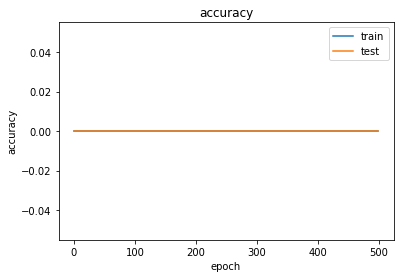

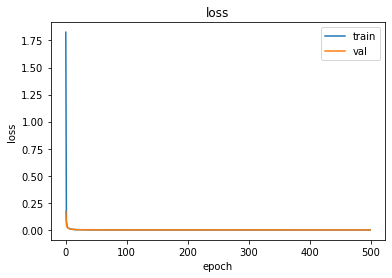

In [111]:
# plot model accuracy and loss 
  # accuracy
plt.plot(history_classification.history['accuracy'])
plt.plot(history_classification.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# loss
plt.plot(history_classification.history['loss'])
plt.plot(history_classification.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# **make Model Regression**

In [104]:
# create model
model_regression = keras.models.Sequential()
model_regression.add(keras.Input(shape=x_train.shape[1]))
model_regression.add(keras.layers.Dense(512, activation='relu'))
model_regression.add(keras.layers.Dense(100, activation='sigmoid'))
model_regression.add(keras.layers.Dense(1, activation='linear'))
# Compile model
model_regression.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])
model_regression.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 512)               46592     
_________________________________________________________________
dense_49 (Dense)             (None, 100)               51300     
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 101       
Total params: 97,993
Trainable params: 97,993
Non-trainable params: 0
_________________________________________________________________


train and test data

In [105]:
# fit model on the dataset
print(x_train.shape)
print(y_train.shape)
history_regression = model_regression.fit(x_train,y_train, epochs=500,verbose= False,validation_split=2/9)
loss_regression, acc_regression = model_regression.evaluate(x_test,y_test, verbose = 2)

(900, 90)
(900,)
4/4 - 0s - loss: 0.0833 - mean_squared_error: 0.0207


plot result

{'loss': [0.1609950065612793, 0.09778811037540436, 0.0923716276884079, 0.08744744211435318, 0.08794603496789932, 0.08698433637619019, 0.08767618983983994, 0.08698304742574692, 0.08709760755300522, 0.08995869010686874, 0.09030353277921677, 0.08649341762065887, 0.08949050307273865, 0.09013132005929947, 0.08751308172941208, 0.08751381188631058, 0.09014029055833817, 0.08781297504901886, 0.08635952323675156, 0.09279679507017136, 0.09437598288059235, 0.08789883553981781, 0.08811245858669281, 0.08506261557340622, 0.0857151597738266, 0.08630942553281784, 0.08580639213323593, 0.087026447057724, 0.08451931178569794, 0.08886466175317764, 0.0849703997373581, 0.08592788875102997, 0.08446986228227615, 0.08422085642814636, 0.08378001302480698, 0.08388855308294296, 0.08523104339838028, 0.08295328170061111, 0.08281045407056808, 0.0895770937204361, 0.08986515551805496, 0.0856158509850502, 0.08446948230266571, 0.08526911586523056, 0.0840282216668129, 0.0864197313785553, 0.09084396064281464, 0.08396368473

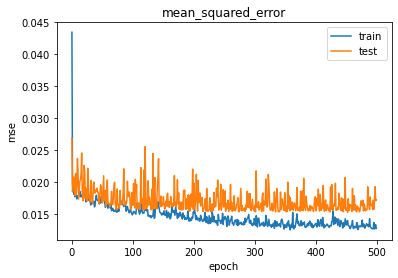

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Unrecognized location 'upper best'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


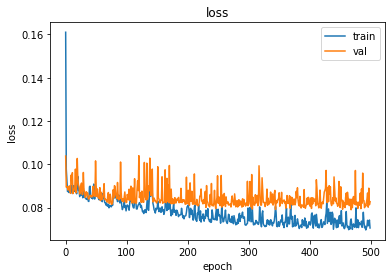

In [110]:
# plot model accuracy and loss 
# mean squere error
print(history_regression.history)
plt.plot(history_regression.history['mean_squared_error'])
plt.plot(history_regression.history['val_mean_squared_error'])
plt.title('mean_squared_error')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# loss
plt.plot(history_regression.history['loss'])
plt.plot(history_regression.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper best')
plt.show()